#Code developed for the Kearney Analytics Assessment
####Developed using Google Colab environment

Mateus Furlin Bampi - 20/03/2022


#1 - Initial Data Analysis

##A. Exploratory Data Analysis

### A1. Read, clean and explore the received data. Explain each step and why.

In [1]:
# Starting by reading the document provided we can tell that this is a classification problem; 
# Based on the classes provided we're trying to guess what's going to be the outcome of our target class 'collected';
# We can remove the columns 'client_id' and 'contractor_id' because they won't add any information to our model;
# There are several columns that are categorical that will have to be converted to numerical in order to train the model;

In [2]:
#Importing libraries that will be used during this exercise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.utils import resample
import os

In [3]:
#Importing data straight from google drive
from google.colab import drive
drive.mount('/content/drive/')

workdir_path = '/content/drive/My Drive/Kearney' #path to the workspace with the data
os.chdir(workdir_path)

Mounted at /content/drive/


In [4]:
#Storing data to a dataframe to be manipulated
df = pd.read_csv("utilities_disconnection.csv", delimiter=";", decimal=',')

In [5]:
#Displaying the top 3 and bottom 3 rows of the dataset
df.head(3)

,client_id,regional,site,client_class,client_subclass,connection_type,connection_status,installment_value,installment_status,total_debt,total_bills,disconnection_date,disconnection_requested,contractor_id,disconnection_executed,collected
0,0,1,13414,1,7,single-phase connection,disconnected,252.39,complete,662.62,4,2017-03-06,circuit_break,66.0,circuit_break,0.0
1,1,1,14071,1,1,single-phase connection,disconnected,0.00,NaN,1202.45,17,2017-03-31,circuit_break,73.0,circuit_break,0.0
2,2,1,12380,1,1,biphasic connection,disconnected,0.00,NaN,352.56,1,2017-03-20,circuit_break,20.0,circuit_break,0.0


In [6]:
df.tail(3)

,client_id,regional,site,client_class,client_subclass,connection_type,connection_status,installment_value,installment_status,total_debt,total_bills,disconnection_date,disconnection_requested,contractor_id,disconnection_executed,collected
618343,131401,1,14010,1,7,single-phase connection,disconnected,360.45,complete,749.98,8,2018-02-28,pole,73.0,circuit_break,0.0
618344,462063,4,42491,1,1,single-phase connection,disconnected,665.38,complete,760.03,9,2018-02-28,pole,272.0,pole,0.0
618345,284385,4,44562,4,1,single-phase connection,disconnected,387.36,complete,637.54,7,2018-02-01,circuit_break,316.0,circuit_break,0.0


In [7]:
#Displaying information about the variables of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618346 entries, 0 to 618345
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   client_id                618346 non-null  int64  
 1   regional                 618346 non-null  int64  
 2   site                     618346 non-null  int64  
 3   client_class             618346 non-null  int64  
 4   client_subclass          618346 non-null  int64  
 5   connection_type          618346 non-null  object 
 6   connection_status        618346 non-null  object 
 7   installment_value        618346 non-null  float64
 8   installment_status       247561 non-null  object 
 9   total_debt               618346 non-null  float64
 10  total_bills              618346 non-null  int64  
 11  disconnection_date       618346 non-null  object 
 12  disconnection_requested  618346 non-null  object 
 13  contractor_id            618346 non-null  float64
 14  disc

In [8]:
#Displaying statistics about the numerical data
df.describe()

,client_id,regional,site,client_class,client_subclass,installment_value,total_debt,total_bills,contractor_id,collected
count,6.183460e+05,618346.000000,618346.000000,618346.000000,618346.000000,618346.000000,618346.000000,618346.000000,618346.000000,618346.000000
mean,4.079352e+05,2.368648,25879.205620,1.155804,1.475134,228.524495,406.257256,2.477576,159.409845,0.433602
std,3.150273e+05,1.131973,11393.975564,0.572867,1.744205,778.999139,2221.629077,4.479946,81.248518,0.495572
min,0.000000e+00,1.000000,11170.000000,1.000000,1.000000,0.000000,5.920000,1.000000,6.000000,0.000000
25%,1.412260e+05,1.000000,14071.000000,1.000000,1.000000,0.000000,98.792500,1.000000,73.000000,0.000000
50%,3.214895e+05,2.000000,21081.000000,1.000000,1.000000,0.000000,170.850000,1.000000,156.000000,0.000000
75%,6.306098e+05,4.000000,41572.000000,1.000000,1.000000,248.120000,346.110000,2.000000,211.000000,1.000000
max,1.100749e+06,4.000000,45471.000000,7.000000,92.000000,173855.100000,419092.780000,167.000000,331.000000,1.000000


In [9]:
#Checking if there are any missing values in the dataset
df.isnull().sum()

client_id                       0
regional                        0
site                            0
client_class                    0
client_subclass                 0
connection_type                 0
connection_status               0
installment_value               0
installment_status         370785
total_debt                      0
total_bills                     0
disconnection_date              0
disconnection_requested         0
contractor_id                   0
disconnection_executed          0
collected                       0
dtype: int64

In [10]:
#Considering what is written on the appendix, every missing value of the column installment_status refers to non applicable data
df['installment_status'].value_counts()

complete    227701
current      19860
Name: installment_status, dtype: int64

In [11]:
#Before plotting all the charts we'll do a little pre-processing to handle missing values, remove the columns that won't add anything to our model and
#change the type of columns that refer to decimal values

#Dealing with the missing value of the installment_status columns
df['installment_status'] = df['installment_status'].fillna('not_applicable')

#Removing the columns client_id and contractor_id because they won't add any information to our model
df.drop(['client_id','contractor_id'], axis='columns', inplace=True)

#Changing the type of columns of decimal values to be able to manipulate these values further on
df[["installment_value", "total_debt"]] = df[["installment_value", "total_debt"]].apply(pd.to_numeric)

In [12]:
#checking if the code above worked
df.head(1)

,regional,site,client_class,client_subclass,connection_type,connection_status,installment_value,installment_status,total_debt,total_bills,disconnection_date,disconnection_requested,disconnection_executed,collected
0,1,13414,1,7,single-phase connection,disconnected,252.39,complete,662.62,4,2017-03-06,circuit_break,circuit_break,0.0


In [13]:
df['installment_status'].value_counts()

not_applicable    370785
complete          227701
current            19860
Name: installment_status, dtype: int64

In [14]:
#creating a new dataframe with the month and year of the discconection_date to check for seasonalities
df2 = df
df2['disconnection_date_year'] = pd.DatetimeIndex(df2['disconnection_date']).year
df2['disconnection_date_month'] = pd.DatetimeIndex(df2['disconnection_date']).month
df2.head(3)

,regional,site,client_class,client_subclass,connection_type,connection_status,installment_value,installment_status,total_debt,total_bills,disconnection_date,disconnection_requested,disconnection_executed,collected,disconnection_date_year,disconnection_date_month
0,1,13414,1,7,single-phase connection,disconnected,252.39,complete,662.62,4,2017-03-06,circuit_break,circuit_break,0.0,2017,3
1,1,14071,1,1,single-phase connection,disconnected,0.00,not_applicable,1202.45,17,2017-03-31,circuit_break,circuit_break,0.0,2017,3
2,1,12380,1,1,biphasic connection,disconnected,0.00,not_applicable,352.56,1,2017-03-20,circuit_break,circuit_break,0.0,2017,3


In [15]:
#concatenating columns month and year of disconnection
df2["disconnection_period"] =  df2["disconnection_date_month"].astype(str) + '/' + df2["disconnection_date_year"].astype(str)

In [16]:
df2['disconnection_period'].value_counts()

3/2017     62738
5/2017     59903
12/2017    57639
6/2017     54307
4/2017     54067
11/2017    52111
8/2017     48385
1/2018     48292
2/2018     46112
9/2017     45202
7/2017     44992
10/2017    44598
Name: disconnection_period, dtype: int64

In [17]:
#dropping all the columns of disconnection except for disconnnection_period
df2.drop(['disconnection_date', 'disconnection_date_year', 'disconnection_date_month'], inplace=True, axis=1)

In [18]:
df2.head(3)

,regional,site,client_class,client_subclass,connection_type,connection_status,installment_value,installment_status,total_debt,total_bills,disconnection_requested,disconnection_executed,collected,disconnection_period
0,1,13414,1,7,single-phase connection,disconnected,252.39,complete,662.62,4,circuit_break,circuit_break,0.0,3/2017
1,1,14071,1,1,single-phase connection,disconnected,0.00,not_applicable,1202.45,17,circuit_break,circuit_break,0.0,3/2017
2,1,12380,1,1,biphasic connection,disconnected,0.00,not_applicable,352.56,1,circuit_break,circuit_break,0.0,3/2017


In [19]:
#Getting a  list to change the order of the columns
list(df2.columns.values)

['regional',
 'site',
 'client_class',
 'client_subclass',
 'connection_type',
 'connection_status',
 'installment_value',
 'installment_status',
 'total_debt',
 'total_bills',
 'disconnection_requested',
 'disconnection_executed',
 'collected',
 'disconnection_period']

In [20]:
df2 = df2[['regional',
 'site',
 'client_class',
 'client_subclass',
 'connection_type',
 'connection_status',
 'installment_value',
 'installment_status',
 'total_debt',
 'total_bills',
 'disconnection_requested',
 'disconnection_executed',
 'disconnection_period',
 'collected',]]

In [21]:
df2.head(2)

,regional,site,client_class,client_subclass,connection_type,connection_status,installment_value,installment_status,total_debt,total_bills,disconnection_requested,disconnection_executed,disconnection_period,collected
0,1,13414,1,7,single-phase connection,disconnected,252.39,complete,662.62,4,circuit_break,circuit_break,3/2017,0.0
1,1,14071,1,1,single-phase connection,disconnected,0.00,not_applicable,1202.45,17,circuit_break,circuit_break,3/2017,0.0


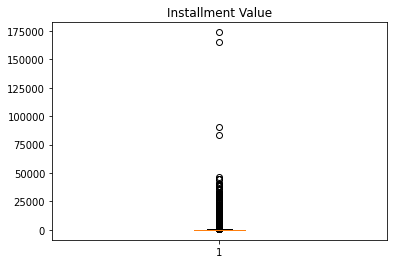

In [22]:
#Looking for outliers in the numerical data using boxplots
plt.boxplot(df2['installment_value'])
plt.title("Installment Value")
plt.show()

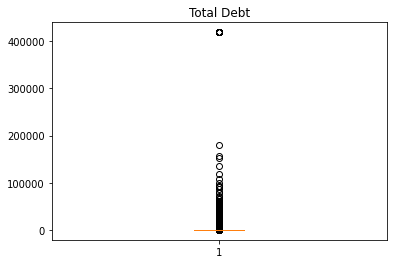

In [23]:
plt.boxplot(df2['total_debt'])
plt.title("Total Debt")
plt.show()

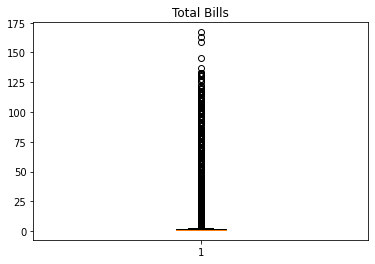

In [24]:
plt.boxplot(df2['total_bills'])
plt.title("Total Bills")
plt.show()

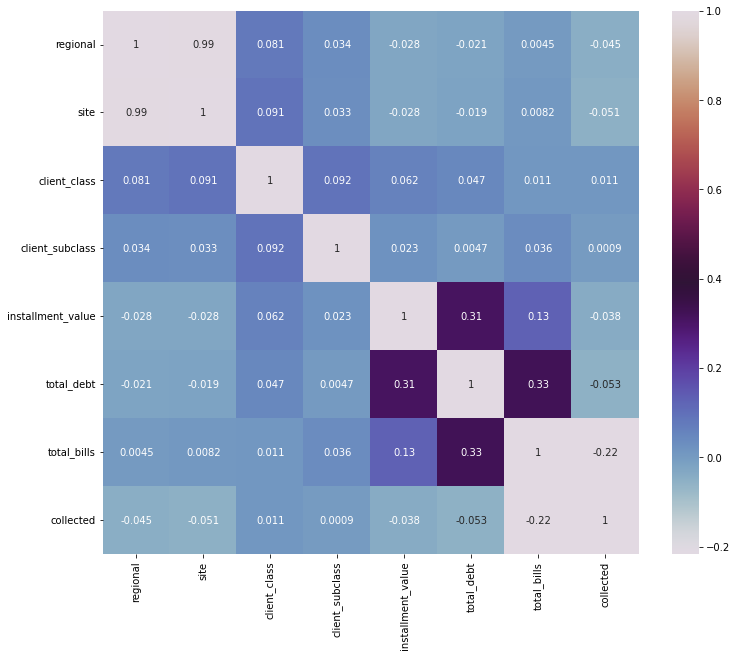

In [25]:
#Plotting a correlation matrix to verrify how correlated our variables are
plt.figure(figsize = (12,10))
c = df2.corr()
sns.heatmap(c, annot = True, cmap = 'twilight')

### A2. What’s the distribution for customer total debt variable? Draw a histogram. How should you group this variable?

Freedman–Diaconis number of bins: 72182


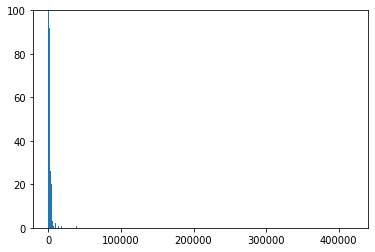

In [26]:
#To verify the correct size of bins in a histogram we use the Freedman–Diaconis rule that is:
#Bin Width = 2 * (IQR(x)) / (n^(-1/3))

#Theres a disproportionate ammount of occurencies in the first bin (60.000+) so we're setting the maximum value of the y axis to 100 to be able to 
#visualize the histogram
ax = plt.gca()
ax.set_ylim([0, 100])

#converting dataframe column to a list to pass into the formula
x = df2['total_debt'].tolist()

#getting the number of bins of the histogram
q25, q75 = np.percentile(x, [25, 75])
bin_width = 2 * (q75 - q25) * len(x) ** (-1/3)
bins = round((max(x) - min(x))/bin_width)
print("Freedman–Diaconis number of bins:", bins)
plt.hist(x, bins=bins)
plt.show()

### A3. Analyze the “collected” variable correlating it to separate variables. Plot this information.

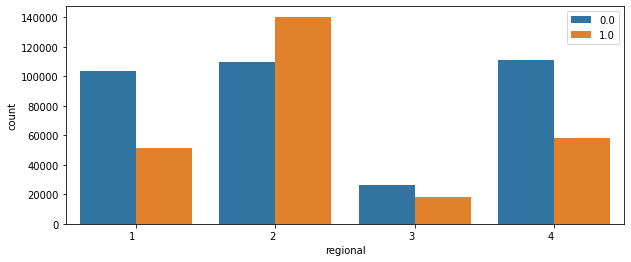

In [27]:
#regional x collected
plt.figure(figsize=(10,4))
ax = sns.countplot(data=df2, x='regional', hue='collected')
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.legend(loc=1)
plt.show()

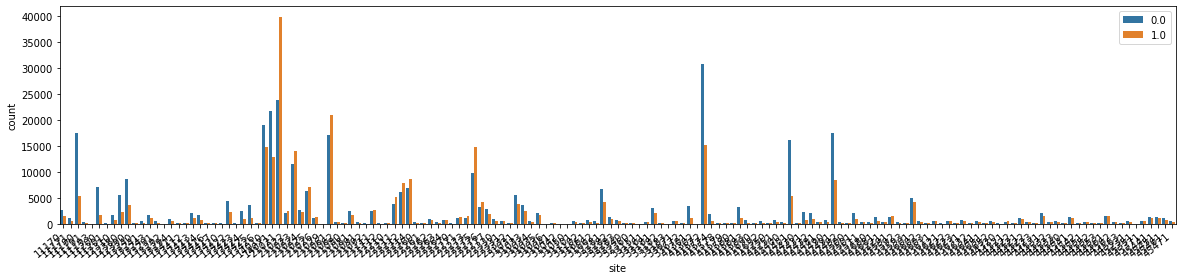

In [28]:
#site x collected
plt.figure(figsize=(20,4))
ax = sns.countplot(data=df2, x='site', hue='collected')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.legend(loc=1)
plt.show()

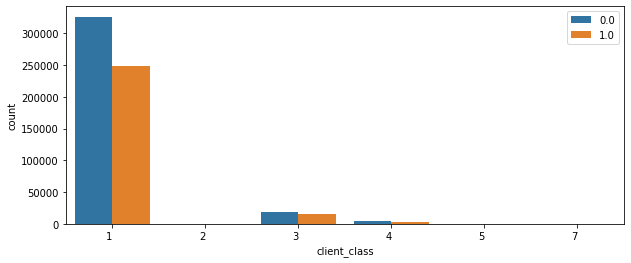

In [29]:
#client_class x collected
plt.figure(figsize=(10,4))
ax = sns.countplot(data=df2, x='client_class', hue='collected')
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.legend(loc=1)
plt.show()

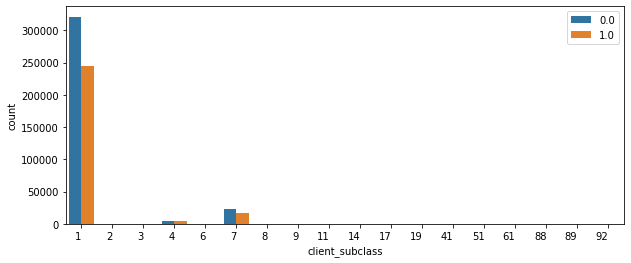

In [30]:
#client_subclass x collected
plt.figure(figsize=(10,4))
ax = sns.countplot(data=df2, x='client_subclass', hue='collected')
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.legend(loc=1)
plt.show()

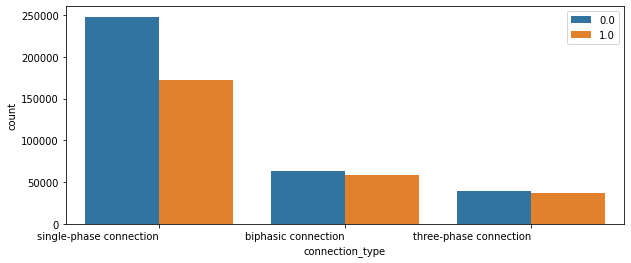

In [31]:
#connection_type x collected
plt.figure(figsize=(10,4))
ax = sns.countplot(data=df2, x='connection_type', hue='collected')
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.legend(loc=1)
plt.show()

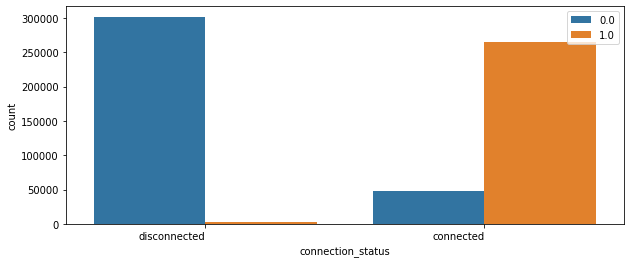

In [32]:
#connection_status x collected
plt.figure(figsize=(10,4))
ax = sns.countplot(data=df2, x='connection_status', hue='collected')
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.legend(loc=1)
plt.show()

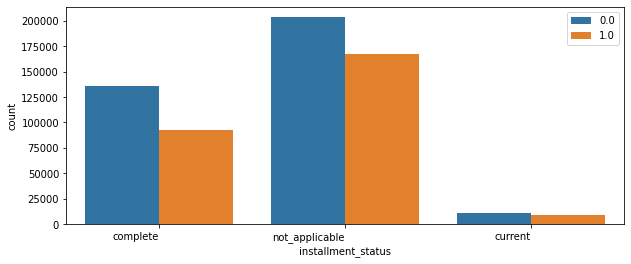

In [33]:
#installment_status x collected
plt.figure(figsize=(10,4))
ax = sns.countplot(data=df2, x='installment_status', hue='collected')
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.legend(loc=1)
plt.show()

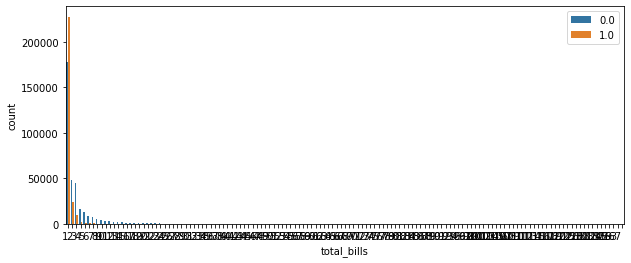

In [34]:
#total_bills x collected
plt.figure(figsize=(10,4))
ax = sns.countplot(data=df2, x='total_bills', hue='collected')
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.legend(loc=1)
plt.show()

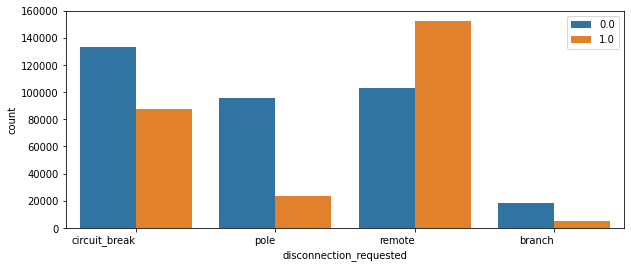

In [35]:
#disconnection_requested x collected
plt.figure(figsize=(10,4))
ax = sns.countplot(data=df2, x='disconnection_requested', hue='collected')
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.legend(loc=1)
plt.show()

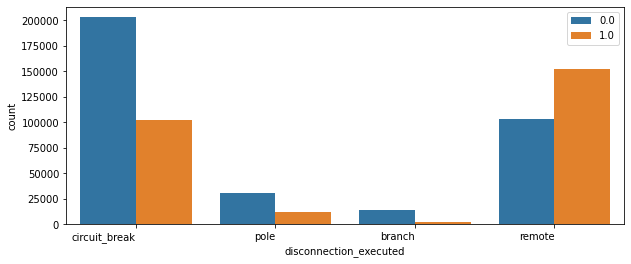

In [36]:
#disconnection_executed x collected
plt.figure(figsize=(10,4))
ax = sns.countplot(data=df2, x='disconnection_executed', hue='collected')
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.legend(loc=1)
plt.show()

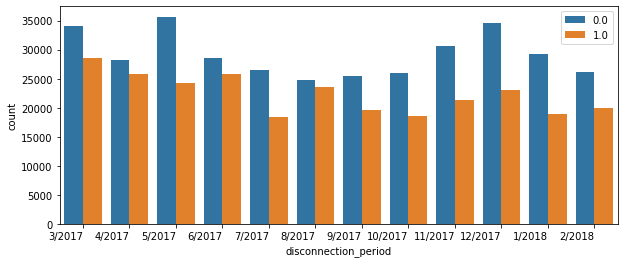

In [37]:
#disconnection_period x collected
plt.figure(figsize=(10,4))
ax = sns.countplot(data=df2, x='disconnection_period', hue='collected')
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.legend(loc=1)
plt.show()

In [38]:
#As we can see in the charts above, there are some variables that explain our model much more than others without adding too much
#complexity. We could try to guess by looking at these charts which ones would be best fitted to predict our model but we will use a statistical model
#model to make this prediction in the next segment.

##B. Feature selection

### B1. Select the top 3-6 variables you consider that may be most important for root-cause analysis. Explain your considerations.

In [39]:
#Here we're going to use a statistical model for feature selection, not for dimensionality reduction e.g. PCA. Considering our dataset does not have too many
#variables, the second one would probably be unnecessary.

In [40]:
#We will use a filter called Chi-Square.

#Explaining Chi-Square:

#When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square 
#value indicates that the hypothesis of independence is incorrect. In simple words, higher Chi-Square values represent that the feature is more dependent 
#on the response and it can be selected for model training.

In [41]:
#copy dataframe to manipulate it's data
df2_copy = df2.copy() 

#get all categorical columns
cat_columns = df2_copy.select_dtypes(['object']).columns

#convert all categorical columns to numeric
df2_copy[cat_columns] = df2_copy[cat_columns].apply(lambda x: pd.factorize(x)[0])

df2_copy.head(2)

,regional,site,client_class,client_subclass,connection_type,connection_status,installment_value,installment_status,total_debt,total_bills,disconnection_requested,disconnection_executed,disconnection_period,collected
0,1,13414,1,7,0,0,252.39,0,662.62,4,0,0,0,0.0
1,1,14071,1,1,0,0,0.00,1,1202.45,17,0,0,0,0.0


In [42]:
#Splitting the dataframe in order to use the chi squared to make the features selecion
X = df2_copy.drop('collected',axis=1)
y = df2_copy['collected']

#Applying chi squared algorythm and selecting the 6 best features
test = SelectKBest(score_func=chi2, k=6)
fit = test.fit(X, y)

X_new=test.fit_transform(X, y)
feat_importances = pd.Series(fit.scores_, index=X.columns)
topFatures = feat_importances.nlargest(6).copy().index.values

print("TOP 6 Features (Best to worst) :\n")
print(topFatures)

TOP 6 Features (Best to worst) :

['total_debt' 'site' 'installment_value' 'total_bills' 'connection_status'
 'disconnection_executed']


### B2. Are there any kind of preprocessing needed for these variables? Do that if so.

In [43]:
#Yes, in this stage we still need to the the following:
#-Remove outliers from the numerical data('total_debt' 'installment_value' 'total_bills') (outliers can make our model perform poorly so it's always good to remove them)
#-Balance the dependent variable if needed ('collected') (balancing the classes is important to help the model train equaly on every class available)
#-Create dummy variables for the categorical variables(connection_status' 'disconnection_executed') (the models usually don't understand categorical data so we need to transform
#them to numerical data)
#-Normalize Dataset (normalization is important so the model considers all variables with the same weight to the model, not normalizing can make our model perform poorly)

#We don't need to handle missing values or feature selection because thats been done in previous items

In [44]:
#To remove outliers we are going to use Z Score to define the values as outliers. 
#Considering these distributions are approximate like a half normal distribution, only Above mean+3*(sigma) values are considered outliers.

print("Highest value allowed for total_debt",df2['total_debt'].mean() + 3*df2['total_debt'].std())
print("Highest value allowed for installment_value",df2['installment_value'].mean() + 3*df2['installment_value'].std())
print("Highest value allowed for total_bills",df2['total_bills'].mean() + 3*df2['total_bills'].std())

Highest value allowed for total_debt 7071.144487934689
Highest value allowed for installment_value 2565.5219124720866
Highest value allowed for total_bills 15.917414340764383


In [45]:
#Shape of the dataset before trimming the outliers
df2.shape

(618346, 14)

In [46]:
#Shape of the dataset after trimming the outliers
df2 = df2[df2.total_bills < 15.92]
df2 = df2[df2.installment_value < 2565.53]
df2 = df2[df2.total_debt < 7071.15]
df2.shape

(600478, 14)

0.0    335207
1.0    265271
Name: collected, dtype: int64

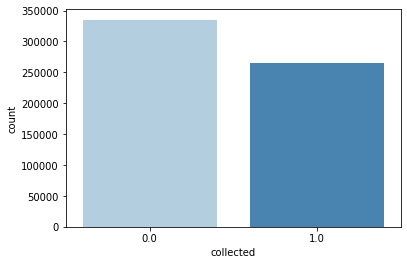

In [47]:
#Balancing the dataset. If the data set is unbalanced we might have problems during training as the model could overtrain in one class over the other.
#If needed, here we can choose to upsample, downsample or generate synthetic data with an algorithm like SMOTE.

#Check how balanced the dataset is
ax = sns.countplot(data=df2, x='collected',palette="Blues")
df2['collected'].value_counts()

In [48]:
#To make sure we won't lose any information, we'll choose to upsample the dataset. Ideally we would try each method and check the models performance
#and choose the best one

#breaking apart the minor and major classes
df2_major = df2[df2.collected==0]
df2_minor = df2[df2.collected==1]

#upsampling the minor class
df2_minor_upsampled = resample(df2_minor, 
                                 replace=True,     
                                 n_samples=335207,    
                                 random_state=123)

#combining both classes again
df4 = pd.concat([df2_major, df2_minor_upsampled])

#resetting index
df4.reset_index(drop=True, inplace=True)

#checking if the classes are balanced
df4.collected.value_counts()

0.0    335207
1.0    335207
Name: collected, dtype: int64

In [49]:
#Creating dummy variables for the categorical data (connection_status' 'disconnection_executed')
df4 = pd.get_dummies(df4)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670414 entries, 0 to 670413
Data columns (total 36 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   regional                                 670414 non-null  int64  
 1   site                                     670414 non-null  int64  
 2   client_class                             670414 non-null  int64  
 3   client_subclass                          670414 non-null  int64  
 4   installment_value                        670414 non-null  float64
 5   total_debt                               670414 non-null  float64
 6   total_bills                              670414 non-null  int64  
 7   collected                                670414 non-null  float64
 8   connection_type_biphasic connection      670414 non-null  uint8  
 9   connection_type_single-phase connection  670414 non-null  uint8  
 10  connection_type_three-phase conn

In [50]:
#Dropping all columns we won't use in our model
#all but these 'site' 'total_debt' 'installment_value' 'total_bills' and the dummy variables of 'connection_status' 'disconnection_executed'
df4 = df4[['site','total_debt','installment_value','total_bills',
           'connection_status_connected','connection_status_disconnected', 
           'disconnection_executed_branch', 'disconnection_executed_circuit_break', 'disconnection_executed_pole', 'disconnection_requested_remote','collected']]
df4.head(2)

,site,total_debt,installment_value,total_bills,connection_status_connected,connection_status_disconnected,disconnection_executed_branch,disconnection_executed_circuit_break,disconnection_executed_pole,disconnection_requested_remote,collected
0,13414,662.62,252.39,4,0,1,0,1,0,0,0.0
1,12380,352.56,0.00,1,0,1,0,1,0,0,0.0


In [51]:
#Normalizing columns 
df5 = df4.copy()
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df5)
#unscaled = scaler.inverse_transform(scaled) use this to 'unnormalize'

#create new dataframe
df5 = pd.DataFrame(scaled)

#rename columns based on the last dataframe
df5.columns=df4.columns.values 

df5.head(1)

,site,total_debt,installment_value,total_bills,connection_status_connected,connection_status_disconnected,disconnection_executed_branch,disconnection_executed_circuit_break,disconnection_executed_pole,disconnection_requested_remote,collected
0,0.065421,0.093087,0.098421,0.214286,0.0,1.0,0.0,1.0,0.0,0.0,0.0


#2 - Model development and evaluation

##A. Model selection

###A1. How do you select a Machine Learning model for this task? What kind of variable are you predicting? Select at least 3 different models.

In [ ]:
#This is a classification problem e.g. we're trying to guess the outcome of the binnary variable 'collected' (0 or 1) based on the input values: 
#'site' 'total_debt' 'installment_value' 'total_bills' and the dummy variables of 'connection_status' 'disconnection_executed'

#In order to achieve this goal, we need to use a model that is specialized in this task. Considering that this problem isn't very complex, we're going to use
#classic machine learning models because they are less computational expensive. Going for neural networks or deep neural networks would add unnecessary complexity to this problem.

#To solve this problem we'll use 3 of the most common models for classification problems: Decision Tree, Random Forest and XGBoost (I Also tried using SVM
#but after 6 hours of runtime trying to find the best hyperparameters I canceled the cell execution and moved on)

###A2. What are the best hyperparameters for these models? Implement a hyperparameters tuning algorithm.

In [52]:
#Splitting the data set into training and testing and getting the data stratified to make sure we won't get imbalanced splits
x = df5[['site','total_debt','installment_value','total_bills',
         'connection_status_connected','connection_status_disconnected', 
         'disconnection_executed_branch', 'disconnection_executed_circuit_break', 
         'disconnection_executed_pole', 'disconnection_requested_remote']]

y = df5['collected']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=4, stratify=y)

In [ ]:
#using the sklearn library we can implement a random search for the best hyperparameters. Sklearn also has GridSearchCV which searchs for the best possible results, but as this
#takes a very long time, we'll stick to a random search (2.84 minutes runtime CPU)
#Decision Tree

dt = DecisionTreeClassifier(random_state=42)

parameters_dt = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]}

random_search = RandomizedSearchCV(estimator = dt, param_distributions=parameters_dt, verbose=1, n_jobs=-1,
                            n_iter=50)
random_result = random_search.fit(x_train, y_train)
print('Best Score: ', random_result.best_score_*100)
print('Best Params: ', random_result.best_params_)

#This cell took 2.84 minutes of runtime
#Best Score:  92.39809718582251
#Best Params:  {'min_samples_leaf': 100, 'max_depth': 10, 'criterion': 'entropy'}


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Score:  92.39809718582251
Best Params:  {'min_samples_leaf': 100, 'max_depth': 10, 'criterion': 'entropy'}


In [ ]:
#Random Forest

rf = RandomForestClassifier(random_state=42)


parameters_rf ={'max_depth': [10, 20, 30],
     'criterion' : ['gini', 'entropy'],
     'max_features': [0.3,0.5,0.7],
     'min_samples_leaf': [5,10,15],
     'min_samples_split': [2,5,10],
     'n_estimators': [200,400,600]}

random_search = RandomizedSearchCV(estimator = rf, param_distributions=parameters_rf, verbose=1, n_jobs=-1,
                            n_iter=10)
random_result = random_search.fit(x_train, y_train)
print('Best Score: ', random_result.best_score_*100)
print('Best Params: ', random_result.best_params_)

#This cell took 2.4 hours of runtime
#Best Score:  92.51030234613425
#Best Params:  {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 0.3, 'max_depth': 30, 'criterion': 'gini'}

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best Score:  92.51030234613425
Best Params:  {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 0.3, 'max_depth': 30, 'criterion': 'gini'}


In [ ]:
#XGBoost

XGB = xgboost.XGBClassifier(random_state=42)

parameters_XGB = {'learning_rate' : [0.10,0.15,0.20],
 'max_depth' : [5, 10, 15],
 'min_child_weight' : [3, 5, 7],
 'gamma' : [0.0, 0.1, 0.2],
 'colsample_bytree' : [0.3, 0.4, 0.5]
}

random_search = RandomizedSearchCV(estimator = XGB, param_distributions=parameters_XGB, verbose=3, n_jobs=-1,
                            n_iter=10)
random_result = random_search.fit(x_train, y_train)
print('Best Score: ', random_result.best_score_*100)
print('Best Params: ', random_result.best_params_)

#This cell took 26 minutes of runtime
#Best Score:  92.52900329292275
#Best Params:  {'min_child_weight': 3, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.4}

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  92.52900329292275
Best Params:  {'min_child_weight': 3, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.4}


###A3. Create train-test splits for your data and implement a cross validation methodology for later evaluation.

In [ ]:
#The code below is commented because train-test split has been done in the previous item, it had to be done in order to predict the best hyperparameters of each model and to avoid
#data leakage. Here we split the data and also used the HoldOut Cross-validation where we split data into two parts in order to the model to be evaluted on unseen data.

#Splitting the data set into training and testing and getting the data stratified to make sure we won't get imbalanced splits
#x = df5[['site','total_debt','installment_value','total_bills',
#         'connection_status_connected','connection_status_disconnected', 
#         'disconnection_executed_branch', 'disconnection_executed_circuit_break', 
#         'disconnection_executed_pole', 'disconnection_requested_remote']]
#y = df5['collected']
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=4, stratify=y)

##B. Model evaluation

###B1. Which metrics can be used to evaluate the models’ performance?  Select at least 4 and explain their meaning briefly. Select the most appropriate one for model comparison.

In [53]:
#Confusion Matrix

#A confusion matrix is a matrix representation of the prediction results of any binary testing that is often used to describe the performance of the classification model 
#on a set of test data for which the true values are known.

#Each prediction can be one of the four outcomes, based on how it matches up to the actual value:
#True Positive (TP): Predicted True and True in reality.
#True Negative (TN): Predicted False and False in reality.
#False Positive (FP): Predicted True and False in reality.
#False Negative (FN): Predicted False and True in reality.

#The diagonal elements represent the number of points for which the predicted label is equal to the true label, while anything off the diagonal was mislabeled by the classifier. 
#Therefore, the higher the diagonal values of the confusion matrix the better, indicating many correct predictions.


In [54]:
#Accuracy

#Accuracy is a common evaluation metric for classification problems. It’s the number of correct predictions made as a ratio of all predictions made.
#It gives us how often the classification is correct. Often used when the classses are balanced.

#Acc = (TP+TN) / total

In [55]:
#Precision

#Precision is mainly used when we have imbalanced classes. For example, if we had a 99/1 split between two classes, A and B, where the rare event, 
#B, is our positive class, we could build a model that was 99% accurate by just saying everything belonged to class A.
#Basically what precision does is analyse when it predicts yes, how often it is correct.

#Precision= TP / predicted yes


In [56]:
#Recall

#Recall gives us the true positive rate (TPR), which is the ratio of true positives to everything positive. Similarly to precision it is used when the classes are imbalanced.

#TPR = TP / actual yes

In [57]:
#For this exercise, considering we have a balanced class, we're going to use Accuracy as the Evaluation Metric.

###B2. Based on the cross validation in the training set, which model was more accurate?

In [58]:
#we did this on A2, while searching best of hyperparameters for these models. The results were:

#Decision Tree
#Best Score:  92.40%
#Best Params:  {'min_samples_leaf': 100, 'max_depth': 10, 'criterion': 'entropy'}

#Random Forest
#Best Score:  92.51%
#Best Params:  {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 0.3, 'max_depth': 30, 'criterion': 'gini'}

#XGBoost
#Best Score:  92.53%
#Best Params:  {'min_child_weight': 3, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.4}

###B3. Generate predictions for the test split for the best model. Join your predictions with the original info and save a file named “[CANDIDATE_NAME]_PREDICTIONS.CSV”. How much is the success rate for this set?

In [59]:
#Training each model with the best hyperparameters found and evaluating it's performance on the test data

#Decision Tree - min_samples_leaf': 100, 'max_depth': 10, 'criterion': 'entropy'
modelDT = DecisionTreeClassifier(min_samples_leaf=100, max_depth=10, criterion='entropy', random_state=42)
modelDT.fit(x_train, y_train)

y_pred_DT = modelDT.predict(x_test)

#Random Forest - 'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 0.3, 'max_depth': 30, 'criterion': 'gini'
modelRF = RandomForestClassifier(n_estimators=400, min_samples_split=10, min_samples_leaf=5, max_features=0.3, max_depth=30, criterion='gini', random_state=42)
modelRF.fit(x_train, y_train)

y_pred_RF = modelRF.predict(x_test)

#XGBoost - 'min_child_weight': 3, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.4
modelXGB = xgboost.XGBClassifier(min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.4, random_state=42)
modelXGB.fit(x_train, y_train)

y_pred_XGB = modelXGB.predict(x_test)


print("Accuracy of the Decision Tree model:", format(metrics.accuracy_score(y_test, y_pred_DT)*100,".2f"), "%")
print("Accuracy of the Random Forest model:", format(metrics.accuracy_score(y_test, y_pred_RF)*100,".2f"), "%")
print("Accuracy of the XGBoost model:", format(metrics.accuracy_score(y_test, y_pred_XGB)*100,".2f"), "%")

Accuracy of the Decision Tree model: 92.34 %
Accuracy of the Random Forest model: 92.48 %
Accuracy of the XGBoost model: 92.53 %


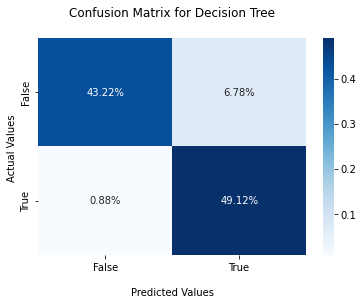

In [60]:
#plotting a confusion matrix for each model just to make sure the accuracy of the models make sense and are not being biased
cf_matrix_DT = confusion_matrix(y_test, y_pred_DT) 

ax = sns.heatmap(cf_matrix_DT/np.sum(cf_matrix_DT), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Decision Tree\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

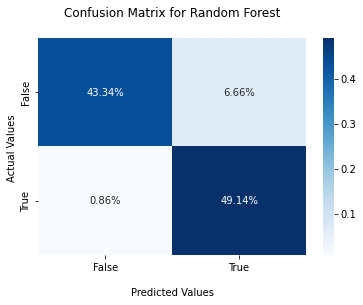

In [61]:
cf_matrix_RF = confusion_matrix(y_test, y_pred_RF) 

ax = sns.heatmap(cf_matrix_RF/np.sum(cf_matrix_RF), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Random Forest\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

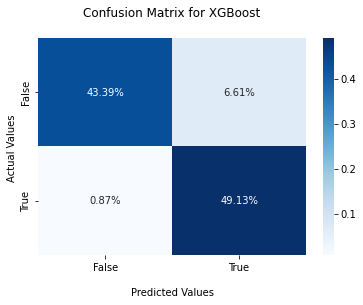

In [62]:
cf_matrix_XGB = confusion_matrix(y_test, y_pred_XGB) 

ax = sns.heatmap(cf_matrix_XGB/np.sum(cf_matrix_XGB), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for XGBoost\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [63]:
#The model with the best accuracy was the XGBoost model, it had 92,53% accuracy, slightly higher than random forest but with significantly less runtime.
#Judging by the confusion matrix, the improvement that XGBoost provides from random forest come from true negatives, increasing the sucess prediction 
#by 0,05% while decreasing the true positives by 0,01%. In this case we're only interested on the best accuracy so this doesn't matter much. On the other hand,
#if we were predicting possible cancer patients we would have to assess if this increment would make sense.

In [64]:
#The documentation wasn't clear if it was needed to create predictions for the whole dataset or only for the test data before exporting to a csv.
#Here I made predictions only for the test dataset, but this can easily manipulated to be done to everything.

In [65]:
#creating a dataframe with the predictions
df_y_pred = pd.DataFrame(y_pred_XGB, columns =['collected (prediction)'])

In [66]:
#joining with the test data
result = pd.concat([x_test, y_test], axis=1)
result = result.reset_index(drop=True)
prediction_result = pd.concat([result,df_y_pred], axis=1)

In [67]:
prediction_result.head(5)

,site,total_debt,installment_value,total_bills,connection_status_connected,connection_status_disconnected,disconnection_executed_branch,disconnection_executed_circuit_break,disconnection_executed_pole,disconnection_requested_remote,collected,collected (prediction)
0,0.945483,0.011778,0.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,0.000875,0.055586,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,0.000583,0.249139,0.0,0.714286,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.287222,0.050508,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.321973,0.006124,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [68]:
prediction_result.tail(5)

,site,total_debt,installment_value,total_bills,connection_status_connected,connection_status_disconnected,disconnection_executed_branch,disconnection_executed_circuit_break,disconnection_executed_pole,disconnection_requested_remote,collected,collected (prediction)
221232,0.641701,0.054716,0.338426,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
221233,0.082796,0.023369,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
221234,0.615463,0.036753,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
221235,0.886592,0.033945,0.000000,0.142857,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
221236,0.321915,0.023119,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [69]:
prediction_result.to_csv('[MATEUS FURLIN BAMPI]_PREDICTIONS.csv')
!cp prediction_result.csv '/content/drive/My Drive/Kearney'

cp: cannot stat 'prediction_result.csv': No such file or directory


###B4. Which variables were most important for this result? Calculate any kind of feature importance metric.

In [70]:
#get the name of each feature
feature_names = list(x_train.columns)

# get most important features
importance = modelXGB.feature_importances_

#saving to a list to plot later on
importance_list = []
for i,v in enumerate(importance):
   importance_list.append(v)

#joining both lists
importance_df = pd.DataFrame({'feature names': feature_names, 'importance': importance_list})

In [71]:
importance_df

,feature names,importance
0,site,0.000060
1,total_debt,0.000057
2,installment_value,0.000045
3,total_bills,0.000570
4,connection_status_connected,0.570305
5,connection_status_disconnected,0.426891
6,disconnection_executed_branch,0.000233
7,disconnection_executed_circuit_break,0.000105
8,disconnection_executed_pole,0.000052
9,disconnection_requested_remote,0.001683


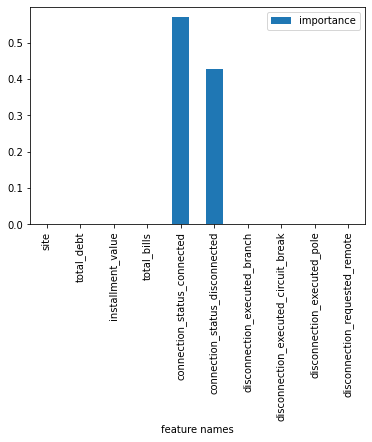

In [72]:
# plot feature importance
ax = importance_df.plot.bar(x='feature names', y='importance', rot=90)

In [73]:
#By far, the 2 most important features in the model were 'connection_status_connected' and 
#'connection_status_disconnected' followed by a pretty big margin by 'disconnection_requested_remote'

#3 - Business sense and technical background

##A. Business sense

###A1. Describe how the client could use the model to improve its debt  collection strategy.

In [74]:
#Based on the variables that were provided, this model could help the clients strategy by helping decide which kind of disconnection could be applied.

#If the company is able to predict the type of discconection needed to collect the debt, it could drive down the costs by increasing the productivity 
#of it's operations.

###A2. Which additional data you think would most add predictive power to the model? Explain why.

In [75]:
#Having historical data on each customer could help the model understand if a certain client has had this problem in the in the past and what the most appropriate
#approach for each individual client.

#Also, if we're talking about major clients and not households, having each clients rating, SERASA's score or even web scapping data regarding each company, would
#probably lead to even better classifications.

###A3. How would you access this data?

In [76]:
#I'm sure that every utility company keeps data on their costumer because they use it to check for eletricity theft so as in having the historical data, 
#it wouldn't be a problem.

#About the companies rating, there is normally a whole area inside the company responsible to do evaluate this data.
#SERASA's rating is a matter of consulting it.
#Web scrapping the data for each company would need a bot to search media outlets, social networks or specialized websites like 'reclame aqui'

##B. Technical background

###B1. How do you avoid overfitting and underfitting in this problem?

In [77]:
#When we implemented the hyperparameters tuning algorithm, we searched for the best possible outcome considering the parameters provided. These parameters
#would provide the most fit model possible, avoiding underfitting.

#When we checked how the model would perform in the test data, we were verifying if the model was overfitted. Considering that the performance was close to
#what we observed in the training data we can safely say that it is not overfitted.

#Overfitting means that the model became so specialized in a dataset that he became biased and can no longer extrapolate this knowledge.

###B2. Explain shortly how you would transfer your model to the client’s IT Department. (Hint: DevOps)

In [78]:
#As a technical standpoint, most machine learning models today are deployed as web services, the easiest way would be to save a persisted model as 
#pickle file and serve it using a web framework. An example would be a REST API using flask or django.

#As project management, having an agile methodology like scrum, along with a DevOps culture, can help the process to run much more smoothly. Having developers,
#operations and QA working together can help in continous integration, continous delivery and continous deployment. Meanwhile, working in sprints can help 
#speed up the delivery of the projects.